In [1]:
system("wget https://raw.githubusercontent.com/alessandriLuca/generalData/main/dockerFileGen_tutorial_deseq/table.csv")
system("wget https://raw.githubusercontent.com/alessandriLuca/generalData/main/dockerFileGen_tutorial_deseq/pasilla_sample_annotation.csv")


In [1]:
cts=read.table("/sharedFolder/table.csv",header=TRUE,row.names=1,sep=",")

In [2]:
head(cts,2)

,untreated1,untreated2,untreated3,untreated4,treated1,treated2,treated3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
FBgn0000003,0,0,0,0,0,0,1
FBgn0000008,92,161,76,70,140,88,70


Note that these are not in the same order with respect to samples!

It is absolutely critical that the columns of the count matrix and the rows of the column data (information about samples) are in the same order. DESeq2 will not make guesses as to which column of the count matrix belongs to which row of the column data, these must be provided to DESeq2 already in consistent order.

As they are not in the correct order as given, we need to re-arrange one or the other so that they are consistent in terms of sample order (if we do not, later functions would produce an error). We additionally need to chop off the "fb" of the row names of coldata, so the naming is consistent.

In [7]:
coldata <- read.csv("pasilla_sample_annotation.csv", row.names=1)
coldata <- coldata[,c("condition","type")]
coldata$condition <- factor(coldata$condition)
coldata$type <- factor(coldata$type)

In [8]:
rownames(coldata) <- sub("fb", "", rownames(coldata))
all(rownames(coldata) %in% colnames(cts))

[1] TRUE

In [9]:
all(rownames(coldata) == colnames(cts))

[1] FALSE

In [10]:
cts <- cts[, rownames(coldata)]
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [11]:
library("DESeq2")
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ condition)
dds

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

class: DESeqDataSet 
dim: 14599 7 
metadata(1): version
assays(1): counts
rownames(14599): FBgn0000003 FBgn0000008 ... FBgn0261574 FBgn0261575
rowData names(0):
colnames(7): treated1 treated2 ... untreated3 untreated4
colData names(2): condition type

In [12]:
featureData <- data.frame(gene=rownames(cts))
mcols(dds) <- DataFrame(mcols(dds), featureData)
mcols(dds)

DataFrame with 14599 rows and 1 column
                   gene
            <character>
FBgn0000003 FBgn0000003
FBgn0000008 FBgn0000008
FBgn0000014 FBgn0000014
FBgn0000015 FBgn0000015
FBgn0000017 FBgn0000017
...                 ...
FBgn0261571 FBgn0261571
FBgn0261572 FBgn0261572
FBgn0261573 FBgn0261573
FBgn0261574 FBgn0261574
FBgn0261575 FBgn0261575

In [13]:
dds <- DESeq(dds)
res <- results(dds)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition untreated vs treated 
Wald test p-value: condition untreated vs treated 
DataFrame with 14599 rows and 6 columns
               baseMean log2FoldChange     lfcSE        stat    pvalue
              <numeric>      <numeric> <numeric>   <numeric> <numeric>
FBgn0000003    0.171569    -1.02604541  3.805503 -0.26962147 0.7874515
FBgn0000008   95.144079    -0.00215142  0.223884 -0.00960955 0.9923328
FBgn0000014    1.056572     0.49673557  2.160264  0.22994204 0.8181368
FBgn0000015    0.846723     1.88276170  2.106432  0.89381546 0.3714206
FBgn0000017 4352.592899     0.24002523  0.126024  1.90459450 0.0568328
...                 ...            ...       ...         ...       ...
FBgn0261571 8.73437e-02     -0.9002942  3.810165  -0.2362875  0.813210
FBgn0261572 6.19714e+00      0.9591315  0.777017   1.2343759  0.217063
FBgn0261573 2.24098e+03     -0.0126158  0.112701  -0.1119412  0.910870
FBgn0261574 4.85774e+03     -0.0152569  0.193148  -0.0789905  0.937040
F

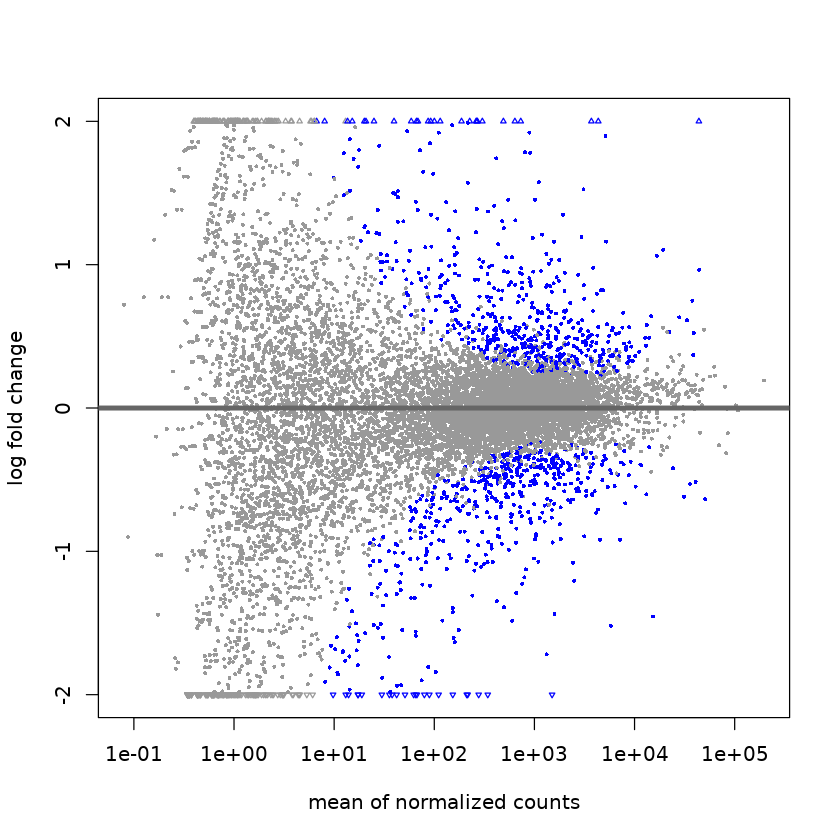

In [17]:
plotMA(res, ylim=c(-2,2))

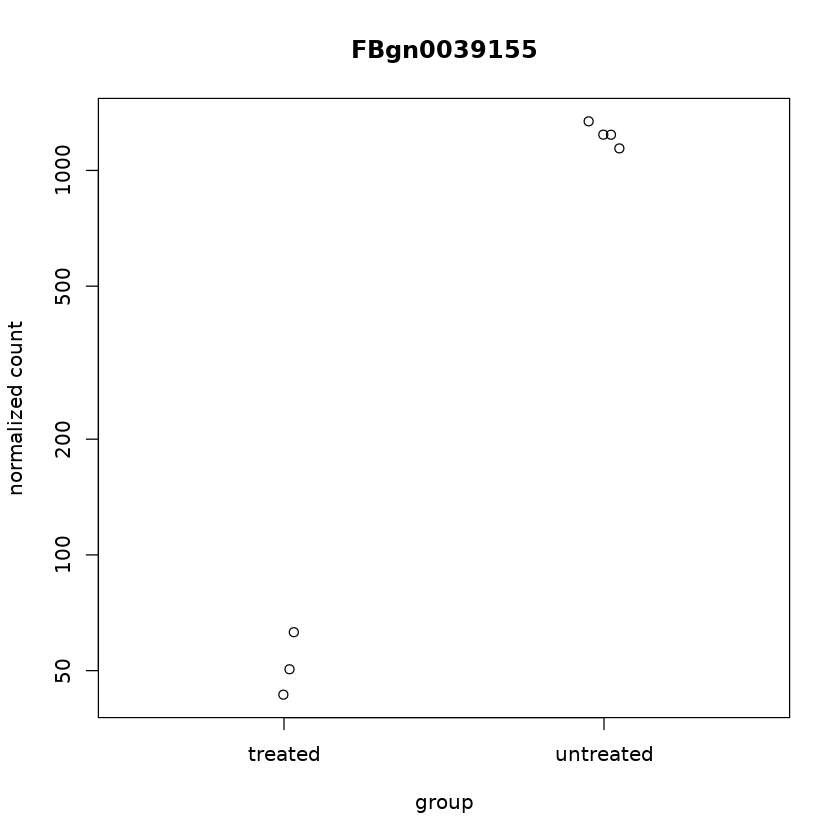

In [19]:
plotCounts(dds, gene=which.min(res$padj), intgroup="condition")

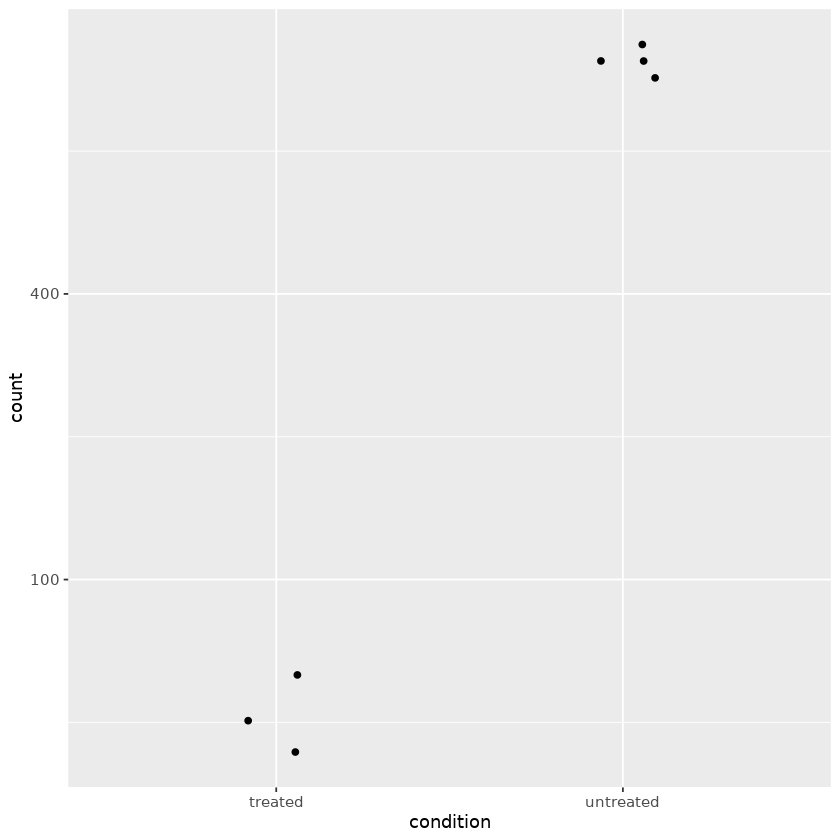

In [20]:
d <- plotCounts(dds, gene=which.min(res$padj), intgroup="condition", 
                returnData=TRUE)
library("ggplot2")
ggplot(d, aes(x=condition, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))